### Exploratory data analyses: 

To understand the data and their distribution. How can we help with vendor profitablity?

In [33]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 17.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 7.2 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.0 MB 6.2 MB/s eta 0:00:01
   ------------- -------------------------- 2.4/7.0 MB 5.4 MB/s eta 0:00:01
   -------------------- ------------------- 3.7/7.0 MB 5.8 MB/s eta 0:00:01
   -------------------------- ------------- 4.7/7.0 MB 5.6 MB/s eta 0:00:01
   -------------------------------

In [34]:
'''import necessary libraries'''
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('vendor_performance.db')

In [3]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

              name
0  begin_inventory
1    end_inventory
2        purchases
3  purchase_prices
4            sales
5   vendor_invoice


In [4]:
for i in tables['name']:
    query = f"SELECT COUNT(*) AS total_rows FROM {i};"
    total_rows = pd.read_sql(query, conn)
    print(f"{i}: table has {total_rows['total_rows'][0]} rows")
    print('-'*40)
    display(pd.read_sql(f"SELECT * FROM {i} LIMIT 5;", conn))


begin_inventory: table has 206529 rows
----------------------------------------


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


end_inventory: table has 224489 rows
----------------------------------------


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


purchases: table has 2372474 rows
----------------------------------------


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


purchase_prices: table has 12261 rows
----------------------------------------


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


sales: table has 12825363 rows
----------------------------------------


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


vendor_invoice: table has 5543 rows
----------------------------------------


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [5]:
for i in tables['name']:
    print(f"Table: {i}")
    query = f"select * from {i};"
    table = pd.read_sql(query, conn)
    print(table.dtypes)

Table: begin_inventory
InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
startDate       object
dtype: object
Table: end_inventory
InventoryId     object
Store            int64
City            object
Brand            int64
Description     object
Size            object
onHand           int64
Price          float64
endDate         object
dtype: object
Table: purchases
InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object
Table: purchase_prices
Brand               int64
Description       

In [79]:
## We first try to understand how much quantity of each sale during the reporting perio (by using begin and end inventory table)
query = ''' select 
                a.brand,
                a.size,
                a.begin_inventory,
                c.purchase_quantity,
                d.sold_quantity,
                b.end_inventory,  
                a.begin_price,
                c.purchased_price,
                d.sales_price,
                b.end_price
          from 
          (select brand,
                  size,
                  sum(onHand) as begin_inventory,
                  avg(price) as begin_price
                  from begin_inventory
                  group by 1,2) as a
          left join 
          (select brand, size,
            sum(onhand) as end_inventory, avg(price) as end_price
           from End_Inventory
           group by 1,2) as b
          on a.brand = b.brand and a.size = b.size
          left join 
          (select brand,size,
          sum(quantity) as purchase_quantity, 
          avg(PurchasePrice) as purchased_price
           from Purchases
           group by 1,2) as c
          on a.brand = c.brand and a.size = c.size
          left join 
          (select brand, size,
          sum(SalesQuantity) as sold_quantity, 
          avg(SalesPrice) as sales_price
           from Sales
           group by 1,2) as d
          on a.brand = d.brand and a.size = d.size
          where a.brand is not null or b.brand is not null or c.brand is not null or d.brand is not null'''

summary_table = pd.read_sql(query, conn)


In [80]:
summary_table.shape

(8094, 10)

In [81]:
display(summary_table.head())

,brand,size,begin_inventory,purchase_quantity,sold_quantity,end_inventory,begin_price,purchased_price,sales_price,end_price
0,58,750mL,281,3550.0,3446.0,385.0,12.99,9.28,12.587496,12.99
1,60,750mL,288,1633.0,1775.0,146.0,10.99,7.40,10.500284,10.99
2,61,750mL,12,312.0,312.0,12.0,13.99,10.60,13.990000,13.99
3,62,750mL,384,3200.0,3125.0,459.0,36.99,28.67,38.379953,36.99
4,63,750mL,365,2855.0,2778.0,442.0,38.99,30.46,40.435205,38.99


In [82]:
#checking null values
summary_table.isnull().sum()

brand                   0
size                    0
begin_inventory         0
purchase_quantity     822
sold_quantity          71
end_inventory        1108
begin_price             0
purchased_price       822
sales_price            71
end_price            1108
dtype: int64

In [83]:
#To understand where sold quantity is null
sold_quantity_null = summary_table[summary_table['sold_quantity'].isnull()]
sold_quantity_null.head()

,brand,size,begin_inventory,purchase_quantity,sold_quantity,end_inventory,begin_price,purchased_price,sales_price,end_price
149,445,Liter,14,NaN,NaN,14.0,8.79,NaN,NaN,8.79
172,518,Liter,12,NaN,NaN,12.0,17.99,NaN,NaN,17.99
188,550,Liter,12,NaN,NaN,12.0,8.99,NaN,NaN,8.99
199,583,Liter,4,NaN,NaN,4.0,16.99,NaN,NaN,16.99
203,588,750mL,3,NaN,NaN,3.0,114.99,NaN,NaN,114.99


In [86]:
#To verify if sold quantity is nan what is the sum of begin inventory + purchased quantity - end inventory: As expected it  should be 0
sold_quantity_null.loc[:, 'sales_check'] = (
    sold_quantity_null['begin_inventory']
    + sold_quantity_null['purchase_quantity'].fillna(0)
    - sold_quantity_null['end_inventory']
)
print(sold_quantity_null[sold_quantity_null['sales_check']<0])
#we find out one brand for store 34 where end inventory is more than begin inventory + purchased quantity which is not possible. 
# So we can drop this entry from our analysis

Empty DataFrame
Columns: [brand, size, begin_inventory, purchase_quantity, sold_quantity, end_inventory, begin_price, purchased_price, sales_price, end_price, sales_check]
Index: []


In [89]:
summary_table['sold_quantity'] = summary_table['sold_quantity'].fillna(0)
summary_table['sales_price_check']=summary_table['sales_price'] - summary_table['end_price']
summary_table[['sold_quantity','sales_price_check']].head()

,sold_quantity,sales_price_check
0,3446.0,-0.402504
1,1775.0,-0.489716
2,312.0,0.000000
3,3125.0,1.389953
4,2778.0,1.445205


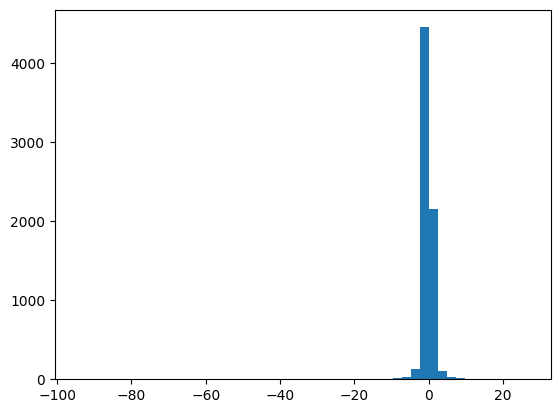

In [91]:
plt.hist(summary_table['sales_price_check'], bins=50)
plt.show()

In [92]:
summary_table['sales_price']=summary_table['sales_price'].fillna(summary_table['end_price'])
summary_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8094 entries, 0 to 8093
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              8094 non-null   int64  
 1   size               8094 non-null   object 
 2   begin_inventory    8094 non-null   int64  
 3   purchase_quantity  7272 non-null   float64
 4   sold_quantity      8094 non-null   float64
 5   end_inventory      6986 non-null   float64
 6   begin_price        8094 non-null   float64
 7   purchased_price    7272 non-null   float64
 8   sales_price        8078 non-null   float64
 9   end_price          6986 non-null   float64
 10  sales_price_check  6931 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 695.7+ KB


In [95]:
summary_table['purchased_price']=summary_table['purchased_price'].fillna(summary_table['end_price'])
summary_table['end_inventory']=summary_table['end_inventory'].fillna(summary_table['begin_inventory'] + summary_table['purchase_quantity'] - summary_table['sold_quantity'])
summary_table['end_price']=summary_table['end_price'].fillna(summary_table['sales_price'])
summary_table['purchase_quantity']=summary_table['purchase_quantity'].fillna(summary_table['sold_quantity'] + summary_table['end_inventory'] - summary_table['begin_inventory'])

summary_table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8094 entries, 0 to 8093
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              8094 non-null   int64  
 1   size               8094 non-null   object 
 2   begin_inventory    8094 non-null   int64  
 3   purchase_quantity  7618 non-null   float64
 4   sold_quantity      8094 non-null   float64
 5   end_inventory      7618 non-null   float64
 6   begin_price        8094 non-null   float64
 7   purchased_price    8078 non-null   float64
 8   sales_price        8078 non-null   float64
 9   end_price          8078 non-null   float64
 10  sales_price_check  6931 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 695.7+ KB


In [52]:
summary_table['sales'] = (summary_table['sold_quantity']*summary_table['sold_price'])
summary_table['Begin_Inventory_value']= (summary_table['Begin_Inventory']*summary_table['begin_price'])
summary_table['End_Inventory_value'] =  (summary_table['End_Inventory']*summary_table['end_price'])
summary_table.head()

,Store,Brand,Size,Begin_Inventory,purchased_quantity,sold_quantity,End_Inventory,begin_price,purchased_price,sold_price,end_price,sold_price_check,inventory_turnover,sales,Begin_Inventory_value,End_Inventory_value
0,1,60,750mL,145487973,39351513.0,7868074.0,176971412.0,15.192297,10.970894,15.133911,15.133911,NaN,NaN,1.190747e+08,2.210296e+09,2.678270e+09
1,1,58,750mL,10080,7350.0,1836.0,13860.0,12.990000,9.280000,12.590000,12.990000,-0.400000,0.148660,2.311524e+04,1.309392e+05,1.800414e+05
2,1,62,750mL,9120,8816.0,2300.0,10640.0,36.990000,28.670000,38.634737,36.990000,1.644737,0.243145,8.885989e+04,3.373488e+05,3.935736e+05
3,1,63,750mL,1440,2832.0,550.0,3360.0,38.990000,30.460000,40.656667,38.990000,1.666667,0.238963,2.236117e+04,5.614560e+04,1.310064e+05
4,1,72,750mL,12,NaN,2.0,8.0,34.990000,34.990000,34.990000,34.990000,0.000000,0.200000,6.998000e+01,4.198800e+02,2.799200e+02


In [ ]:
brand_level_summary = summary_table.groupby('Brand').agg({
    'Begin_Inventory_value': 'sum',
    'End_Inventory_value': 'sum',
    'sales': 'sum'
}).reset_index().sort_values(by='sales', ascending=False)

brand_level_summary.head()

,Brand,Begin_Inventory_value,End_Inventory_value,sales
1064,3405,5.872485e+09,8.387961e+09,5.209031e+08
387,1233,1.014140e+10,1.204372e+10,5.116216e+08
2176,8068,9.816049e+09,9.189739e+09,5.106568e+08
1417,4261,7.827215e+09,8.042267e+09,4.590351e+08
1122,3545,1.076644e+10,1.148107e+10,4.553265e+08


In [62]:
brand_level_summary['inventory_turnover'] = (brand_level_summary['sales'] / ((brand_level_summary['Begin_Inventory_value'] + brand_level_summary['End_Inventory_value']) / 2)).round(2)
brand_level_summary.head()

,Brand,Begin_Inventory_value,End_Inventory_value,sales,inventory_turnover
1064,3405,5.872485e+09,8.387961e+09,5.209031e+08,0.07
387,1233,1.014140e+10,1.204372e+10,5.116216e+08,0.05
2176,8068,9.816049e+09,9.189739e+09,5.106568e+08,0.05
1417,4261,7.827215e+09,8.042267e+09,4.590351e+08,0.06
1122,3545,1.076644e+10,1.148107e+10,4.553265e+08,0.04


ValueError: supplied range of [0.0, inf] is not finite

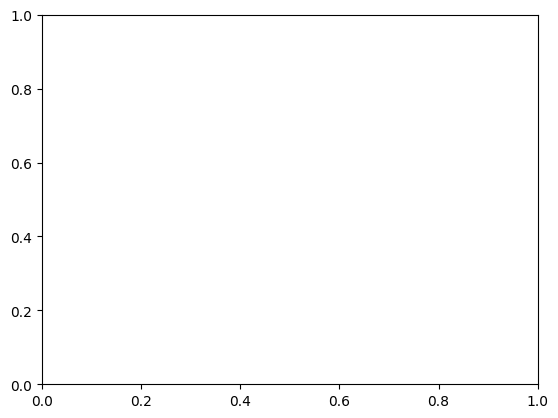

In [63]:
plt.hist(brand_level_summary['inventory_turnover'], bins=30, edgecolor='black')
plt.plot()